In [2]:
import sys
#Indicate operating environment and import core modules
# location_input = input("what computer are you on? a = Bens, b = gpucluster, c = other   ")
# location_dict = {'a': "C:\\Users\Ben\Documents\GitHub\expression_broad_data", 'b': "/home/heineike/github/expression_broad_data/",'c':'you need to add your location to the location_dict'}
# data_processing_dir = location_dict[location_input]
# print("base directory is " + base_dir)
base_dir = "C:\\Users\\heine\\github\\expression_broad_data"

if sys.path[-1] != base_dir:
    sys.path.append(base_dir)
    print("Added " + base_dir + " to path: " )
    print(sys.path)
import os

print("I am about to import a library")
from core import expression_plots 
from core import io_library 

data_processing_dir = base_dir + os.path.normpath("\expression_data") + os.sep

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
# import pickle
# import subprocess
# from collections import Counter
# import scipy.stats as stats
# from itertools import chain
# #this only works if you are online
# online_input = input("are you online? Yes/No")
# if online_input == "Yes": 
#     import plotly.plotly as py
#     py.sign_in('heineike02', 'APPjKrtARaN2ZgUYIkqr')

Added C:\Users\heine\github\expression_broad_data to path: 
['', 'C:\\Users\\heine\\AppData\\Local\\Enthought\\Canopy\\edm\\envs\\bmh_python35_ts\\python35.zip', 'C:\\Users\\heine\\AppData\\Local\\Enthought\\Canopy\\edm\\envs\\bmh_python35_ts\\DLLs', 'C:\\Users\\heine\\AppData\\Local\\Enthought\\Canopy\\edm\\envs\\bmh_python35_ts\\lib', 'C:\\Users\\heine\\AppData\\Local\\Enthought\\Canopy\\edm\\envs\\bmh_python35_ts', 'C:\\Users\\heine\\AppData\\Local\\Enthought\\Canopy\\edm\\envs\\bmh_python35_ts\\lib\\site-packages', 'C:\\Users\\heine\\AppData\\Local\\Enthought\\Canopy\\edm\\envs\\bmh_python35_ts\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\heine\\.ipython', 'C:\\Users\\heine\\github\\expression_broad_data']
I am about to import a library
I am importing io_library
C:\Users\heine\github\expression_broad_data\expression_data


In [3]:
%load_ext autoreload
%autoreload 2
# %matplotlib 
# plt.ioff()
#%matplotlib inline
%matplotlib notebook

#Identify top genes induced by PKA inhibition only in SC. 

In [4]:
#Load cross species comparison data

#YPD data
fname_cross_spec_comparison = data_processing_dir + os.path.normpath("20170817_klscpka/cross_species_compare_ASminus_ASplus_YPD.csv")
kl_sc_PKA_data = pd.read_csv(fname_cross_spec_comparison, index_col=0)
kl_sc_PKA_data
# with open(fname_cross_spec_comparison, 'rb') as pkl_in:
#      comparison_data = pickle.load(pkl_in)

,N SCer Orthologs,kl_genename,sc_genename,baseMean_KL,log2FoldChange_KL,lfcSE_KL,stat_KL,pvalue_KL,padj_KL,rlog_AS_noNMPP1_YPD_t40_mean_KL,...,padj_SC,rlog_AS_noNMPP1_YPD_t40_mean_SC,rlog_AS_yesNMPP1_YPD_t40_mean_SC,rlog_AS_noNMPP1_YPD_t40_var_SC,rlog_AS_yesNMPP1_YPD_t40_var_SC,raw_AS_noNMPP1_YPD_t40_mean_SC,raw_AS_yesNMPP1_YPD_t40_mean_SC,raw_AS_noNMPP1_YPD_t40_var_SC,raw_AS_yesNMPP1_YPD_t40_var_SC,SC_common_name
0,1,KLLA0E08273g,YIL093C,307.097324,-3.117319,0.391869,-7.955013,1.791132e-15,2.616525e-14,8.023578,...,7.999032e-01,5.864384,6.012012,0.102512,0.153527,1.795921,1.975034,0.026258,0.019171,RSM25
1,1,KLLA0E02179g,YNL323W,596.750877,-0.487211,0.413954,-1.176970,2.392077e-01,3.662996e-01,8.748092,...,8.144010e-01,6.841067,6.690319,1.983754,1.266548,2.075730,2.146700,0.219432,0.176372,LEM3
2,1,KLLA0F12056g,YKR076W,721.339292,5.725890,0.404135,14.168246,1.440529e-45,4.800564e-43,5.529407,...,7.773336e-48,4.965655,8.642741,0.007693,0.014076,1.384101,2.853356,0.005008,0.001150,ECM4
3,1,KLLA0E19691g,YDL174C,32.292002,-0.704536,0.665985,-1.057885,2.901077e-01,4.257787e-01,4.606895,...,1.003400e-10,8.842651,10.535558,0.078743,0.013612,2.609322,3.352513,0.022757,0.002677,DLD1
4,1,KLLA0F20273g,YOR163W,373.122032,0.991374,0.372431,2.661898,7.770147e-03,2.074633e-02,7.353489,...,5.395452e-08,7.264692,8.645844,0.001013,0.063187,2.172017,2.797982,0.001943,0.009904,DDP1
5,1,KLLA0D06127g,YOR246C,300.550233,-0.868219,0.396272,-2.190966,2.845426e-02,6.324328e-02,7.852620,...,5.789574e-07,8.839137,7.382572,0.069640,0.105390,2.717814,2.313137,0.019736,0.016472,ENV9
6,1,KLLA0E07063g,YOL137W,1070.413296,-0.255403,0.442553,-0.577113,5.638634e-01,6.923888e-01,9.647924,...,2.203476e-01,7.471431,7.053748,0.146176,0.083442,2.273729,2.246661,0.008723,0.014864,BSC6
7,1,KLLA0F04499g,YNL067W,938.472171,-4.275055,0.414509,-10.313529,6.121162e-25,2.190472e-23,9.664893,...,1.370800e-11,10.372920,8.550739,0.148571,0.018560,3.156162,2.610781,0.008638,0.004957,RPL9B
8,1,KLLA0C15257g,YDR237W,1161.638190,-2.706933,0.385808,-7.016270,2.278691e-12,2.454541e-11,9.964306,...,7.555303e-01,8.014269,8.158493,0.047859,0.077205,2.434586,2.612835,0.015225,0.008768,MRPL7
9,1,KLLA0E08867g,YNL015W,2927.423587,4.691308,0.454999,10.310592,6.311116e-25,2.243391e-23,7.896321,...,3.481628e-18,3.787630,7.135544,0.127834,0.293084,0.997871,2.378694,0.029605,0.032591,PBI2


In [5]:
#Make fold change subsets: 
#was 7 before
pthreshold_KL = 10e-10
pthreshold_SC = 10e-10

gene_set_dict = io_library.make_foldchange_subsets(kl_sc_PKA_data, pthreshold_KL, pthreshold_SC) 


#visualize my various quadrants for raw pre activation, raw activated and fold change plots.

At an adjusted pvalue threshold of 1.00E-09 for K.Lac and 1.00E-09 for S.Cer, there are 417 genes significant for both species, 211 genes significant for KL only, 399 genes significant for SC only, and 3949 unsignificant genes
Genes that are up in S.Cer and Down in K.Lac
['YPL119C', 'YNL014W']
Genes that are up in K.Lac and Down in S.Cer
[]


In [6]:
pthreshold2_SC = 10e-20   #filter the dataset to include only genes below this threshold

kl_sc_PKA_data_scsigact = kl_sc_PKA_data[kl_sc_PKA_data['sc_genename'].isin(gene_set_dict['scsig_act'])]
top_scsigact = kl_sc_PKA_data_scsigact[kl_sc_PKA_data_scsigact['padj_SC']<pthreshold2_SC].sort_values(by='log2FoldChange_SC')
print("There are {:d} genes with padj_SC below a threshold of {:.1E} in the top_scsigact dataset".format(len(top_scsigact), pthreshold2_SC) )


There are 85 genes with padj_SC below a threshold of 1.0E-19 in the top_scsigact dataset


In [7]:
#Load go slim terms
#Set up go term list and database: 
GO_aspect = 'P'
go_slims_aspect, go_term_list = io_library.load_goslim_data(GO_aspect)

In [8]:
#Look at go terms for top SC Sig only genes
gene_set_list = top_scsigact['sc_genename']
go_term_df = io_library.go_terms_for_genelist(gene_set_list, go_slims_aspect, go_term_list)
go_term_df[['genes common name','N genes in goterm','N subset genes in goterm']]

,genes common name,N genes in goterm,N subset genes in goterm
mitochondrion organization,"[ATG8, OM14, SDH6, COX20, CBP4]",424,5
protein dephosphorylation,[GIP2],49,1
cellular amino acid metabolic process,"[ALD2, UGA2]",199,2
nucleobase-containing small molecule metabolic process,"[NDE2, SHH4, CYC7, GUT2, ALD4, GND2, HXK1, TKL...",198,13
oligosaccharide metabolic process,"[TPS2, NTH2, TPS1]",27,3
monocarboxylic acid metabolic process,"[NDE2, UGA2, ALD4, CYB2, HXK1, GOR1]",140,6
cell wall organization or biogenesis,"[SDP1, CSR2]",198,2
meiotic cell cycle,[UBI4],287,1
transmembrane transport,"[SSA4, PEX18, YBR241C, GPD1, RTC2]",233,5
other,"[BDH1, YOR1, RTC3, STF1, SPI1, SUE1, APE1]",249,7


In [10]:
#display key parameters for the top genes: 
column_subset = ['SC_common_name','N SCer Orthologs', 'kl_genename', 'sc_genename',
       'log2FoldChange_KL', 'padj_KL',
       'raw_AS_noNMPP1_YPD_t40_mean_KL', 'raw_AS_yesNMPP1_YPD_t40_mean_KL',
       'log2FoldChange_SC', 'padj_SC', 
       'raw_AS_noNMPP1_YPD_t40_mean_SC', 'raw_AS_yesNMPP1_YPD_t40_mean_SC']

top_scsigact.loc[:,column_subset]

,SC_common_name,N SCer Orthologs,kl_genename,sc_genename,log2FoldChange_KL,padj_KL,raw_AS_noNMPP1_YPD_t40_mean_KL,raw_AS_yesNMPP1_YPD_t40_mean_KL,log2FoldChange_SC,padj_SC,raw_AS_noNMPP1_YPD_t40_mean_SC,raw_AS_yesNMPP1_YPD_t40_mean_SC
3907,LAP2,1,KLLA0F03883g,YNL045W,0.731319,1.369671e-01,2.952804,3.263069,2.619969,4.425286e-22,2.391502,3.313589
2571,BCY1,1,KLLA0E04181g,YIL033C,1.867100,2.247519e-06,2.992060,3.654092,2.638502,3.134995e-24,2.548249,3.477399
1046,COX20,1,KLLA0C15015g,YDR231C,-0.261218,6.270893e-01,2.560262,2.589349,2.812928,5.391278e-22,1.895833,2.870344
326,BDH1,1,KLLA0F00506g,YAL060W,1.766594,5.162224e-03,2.293072,2.927909,2.813210,4.294354e-22,2.566426,3.552251
14,BXI1,1,KLLA0E07503g,YNL305C,1.416737,5.974864e-04,2.214596,2.746629,2.829996,9.934405e-27,2.159903,3.143096
3966,NTH2,2,KLLA0E17271g,YBR001C,2.100226,4.023135e-04,3.049119,3.840772,2.869520,8.086985e-25,2.136703,3.128899
3778,AIM41,1,KLLA0D06853g,YOR215C,-0.783380,9.359792e-02,2.332176,2.197602,2.886807,5.197032e-23,1.794978,2.790141
2837,SDH6,1,KLLA0E02619g,YDR379C-A,0.283219,6.191559e-01,2.302360,2.487533,2.958087,4.693175e-22,1.617745,2.631817
4618,GRX1,2,KLLA0C01298g,YCL035C,1.719177,1.698969e-05,3.009401,3.624058,2.965390,1.695182e-29,2.934180,3.964168
1972,OPI3,1,KLLA0B14234g,YJR073C,1.930139,1.678024e-06,2.194411,2.881341,3.107089,1.464096e-27,2.890393,3.960101


In [ ]:
#Look up by kl genename
kl_sc_PKA_data[kl_sc_PKA_data['kl_genename'] == 'KLLA0B09152g'].loc[:,column_subset]


<IPython.core.display.Javascript object>


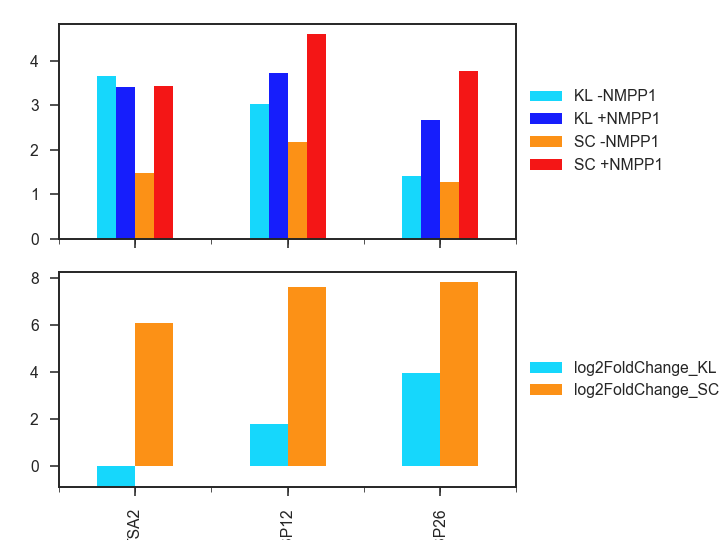

In [11]:
#plot fold change along with raw expression

genes_to_plot = ['TSA2', 'HSP12', 'HSP26']

#['HXT5', 'HXT3', 'CYC7', 'CYC1', 'YJL045W', 'SDH1', 'HXK1', 'HXK2', 'GLK1', 'EMI2', 'SHH4', 'SDH4', 'SLT1'] 

#['XBP1','USV1','RGM1','SDP1','MSG5', 'CSR2','ECM21','BCY1', 'UBI4', 'BXI1', 'TPK1', 'TPK2', 'TPK3']

#pentose phosphate ['TKL2','TKL1','SOL4','SOL3','GND2','GND1','NQM1','TAL1','ZWF1','RKI1','RPE1']


fig, axarr = plt.subplots(2,1,sharex = True)

ax1 = axarr[0]

columns_to_plot = ['raw_AS_noNMPP1_YPD_t40_mean_KL', 'raw_AS_yesNMPP1_YPD_t40_mean_KL',
       'raw_AS_noNMPP1_YPD_t40_mean_SC', 'raw_AS_yesNMPP1_YPD_t40_mean_SC',
       'SC_common_name']

columns_rename = ['KL -NMPP1','KL +NMPP1','SC -NMPP1','SC +NMPP1','SC_common_name']

color_list = [(22.0/255.0,215.0/255.0,252.0/255.0),
              (22.0/255.0,30.0/255.0,252.0/255.0),
              (252.0/255.0,145.0/255.0,22.0/255.0),
              (244.0/255.0,22.0/255.0,22.0/255.0)]


plot_data = kl_sc_PKA_data[kl_sc_PKA_data['SC_common_name'].isin(genes_to_plot)].loc[:,columns_to_plot]
plot_data.columns = columns_rename
plot_data.set_index('SC_common_name',inplace = True)
plot_data.loc[genes_to_plot].plot.bar(ax = ax1, color = color_list).legend(loc='center left', bbox_to_anchor=(1, 0.5))
#ax1.legend(bbox_to_anchor = [1,1])
plt.tight_layout(rect=[0,0,0.75,1])


ax2 = axarr[1]

color_list = [(22.0/255.0,215.0/255.0,252.0/255.0),
              (252.0/255.0,145.0/255.0,22.0/255.0)]

columns_to_plot = ['log2FoldChange_KL', 'log2FoldChange_SC','SC_common_name']
plot_data = kl_sc_PKA_data[kl_sc_PKA_data['SC_common_name'].isin(genes_to_plot)].loc[:,columns_to_plot]
plot_data.set_index('SC_common_name',inplace = True)
plot_data.loc[genes_to_plot].plot.bar(ax = ax2, color = color_list).legend(loc='center left', bbox_to_anchor=(1, 0.5))
#ax2.legend(bbox_to_anchor = [1,1])

In [ ]:
#Make promoter files for meme analysis

#genes_to_plot = ['TKL2','TKL1','SOL4','SOL3','GND2','GND1','NQM1','TAL1','ZWF1','RKI1','RPE1']

#Read in the KL promoter database.  
kl_promoters = pd.read_pickle(base_dir + os.sep + os.path.join("expression_data","kl_promoters","kl_promoters.pkl"))

#Read in the SC promoter database.  
sc_promoters = pd.read_pickle(base_dir + os.sep + os.path.join("expression_data","sc_promoters","sc_promoters.pkl"))

# Make a subset of kl promoters for mitochondrial translation.  
gene_subset_kl_orth = list(set(kl_sc_PKA_data[kl_sc_PKA_data['SC_common_name'].isin(genes_to_plot)]['kl_genename']))
#including set here removes duplicates

kl_promoters_subset = kl_promoters.loc[gene_subset_kl_orth,]

fname = base_dir + os.sep + os.path.join("expression_data", "kl_promoters","promoter_sets", "20171003_pent_promoters_kl.fasta")
prom_seq_column = 4
with open(fname,'w') as f: 
    for row in kl_promoters_subset.itertuples():
        header_line = '>' + row[0] + ' 700bp_upstream\n'
        seq_line = row[prom_seq_column] + '\n'
        f.write(header_line)
        f.write(seq_line)

# Make a subset of sc promoters for mitochondrial translation.  
gene_subset_sc = list(set(kl_sc_PKA_data[kl_sc_PKA_data['SC_common_name'].isin(genes_to_plot)]['sc_genename']))
sc_promoters_subset = sc_promoters.loc[gene_subset_sc,]

fname = base_dir + os.sep + os.path.join("expression_data", "sc_promoters","promoter_sets", "20171003_pent_promoters_sc.fasta")
prom_seq_column = 2
with open(fname,'w') as f: 
    for row in sc_promoters_subset.itertuples():
        header_line = '>' + row[0] + ' 700bp_upstream\n'
        seq_line = row[prom_seq_column] + '\n'
        f.write(header_line)
        f.write(seq_line)

In [ ]:
#motifs_of_interest = ['MSN2','CAT8','CBF1','REB1','XBP1','HSF1','IRE1','MCM1','SFP1','DOT6','CRZ1',]

In [ ]:
#Display results of motif scan in table 
columns_to_plot = ['log2FoldChange_KL', 'log2FoldChange_SC','SC_common_name','kl_genename','sc_genename']
plot_data = kl_sc_PKA_data[kl_sc_PKA_data['SC_common_name'].isin(genes_to_plot)].loc[:,columns_to_plot]
plot_data.set_index('SC_common_name',inplace = True)
plot_data = plot_data.loc[genes_to_plot]

motifs= ['MSN2','XBP1','CAT8','CBF1']

for spec in ['KL','SC']:

    fimo_results_fname_spec = base_dir + os.sep + os.path.join("expression_data", spec.lower() + "_promoters","fimo_output", "20171003_pent_msn2_cat8_xbp1_cbf1_p10m3.txt")

    fimo_results_spec = pd.read_table(fimo_results_fname_spec)

    fimo_results_spec

    

    for motif in motifs : 
        motif_column_spec = []
        for sc_common_name in genes_to_plot:
            name = plot_data.loc[sc_common_name][spec.lower()+ '_genename']
            results_motif_name = fimo_results_spec[(fimo_results_spec['motif_alt_id']==motif)&(fimo_results_spec['sequence_name']==name)]
            #result = "{:d} hits: ".format(len(results_motif_name.index)) + ";".join(["score: {:.1f} , loc: {:d}".format(results_motif_name['score'].loc[ind], results_motif_name['start'].loc[ind]) + ")" for ind in results_motif_name.index])
            result = len(results_motif_name.index)
            motif_column_spec.append(result)
    
        plot_data[motif + "_" + spec] = motif_column_spec

        
plot_data
#results_motif_name_summary = print("({}) ".format(len(results_motif_name.index)))